<a href="https://colab.research.google.com/github/shahtvisha/Brain-AI-exploration/blob/main/StructuralMRI_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.8 MB/s eta 0:00:00


In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import pydicom

In [ ]:
zip_file_path = "/content/DICOM.zip"
extract_to_directory = "DICOM"

In [ ]:
if not os.path.exists(extract_to_directory):
    os.makedirs(extract_to_directory)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

print("Extraction complete!")

Extraction complete!


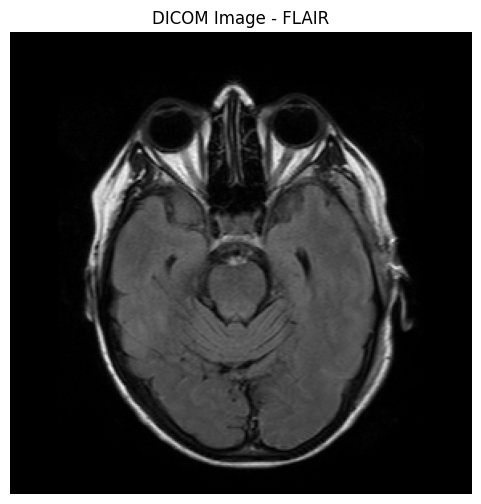

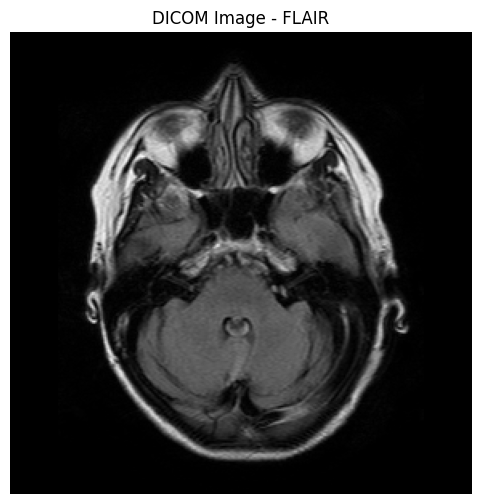

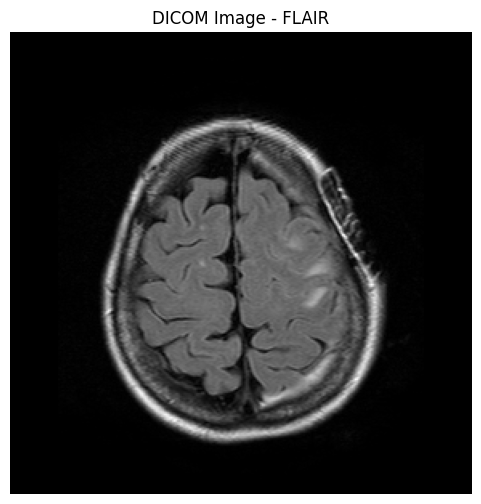

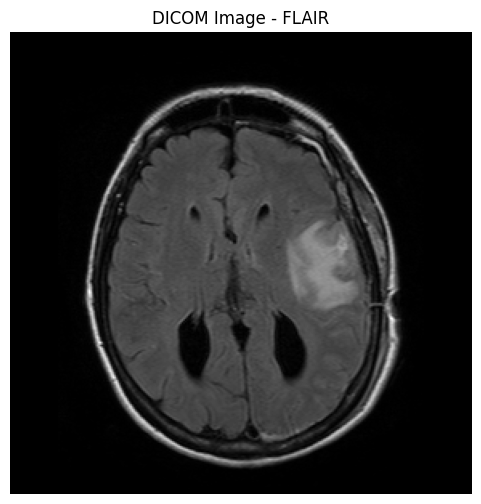

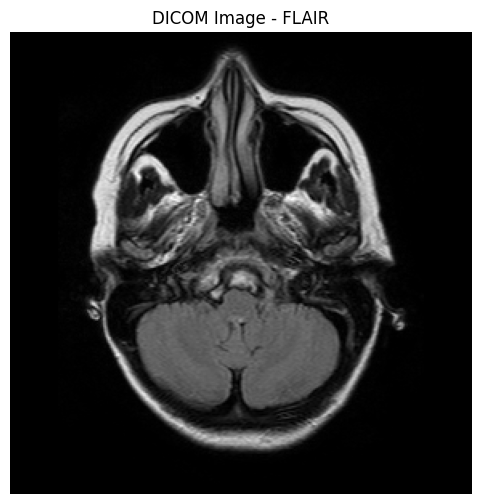

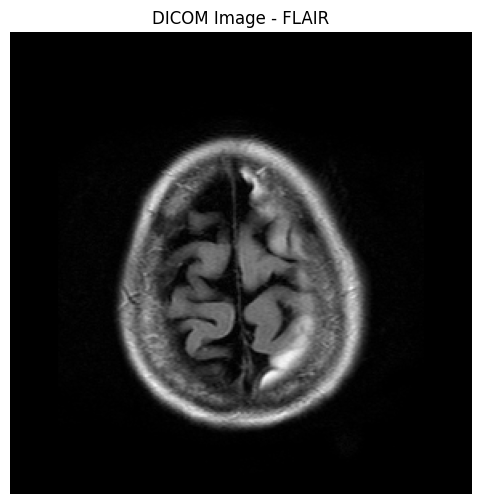

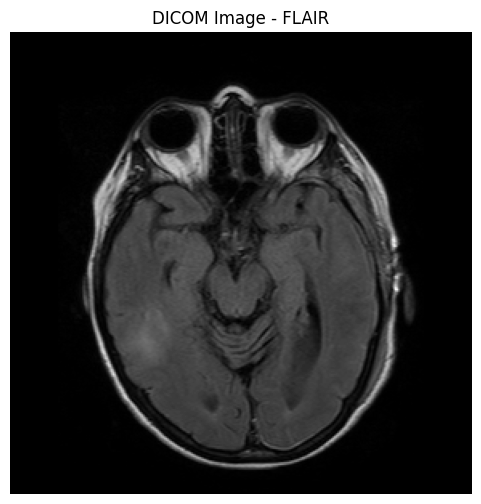

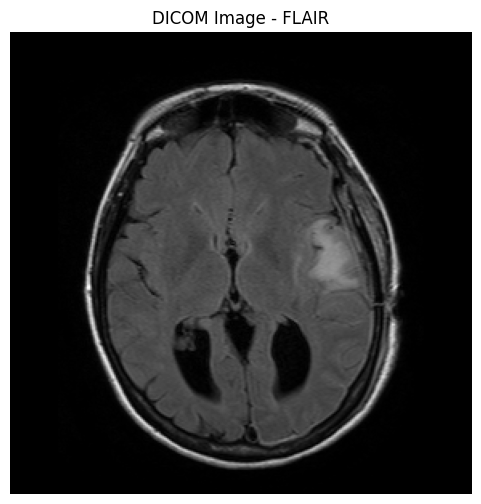

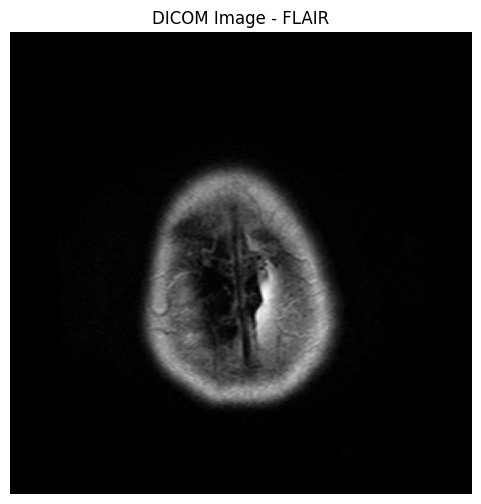

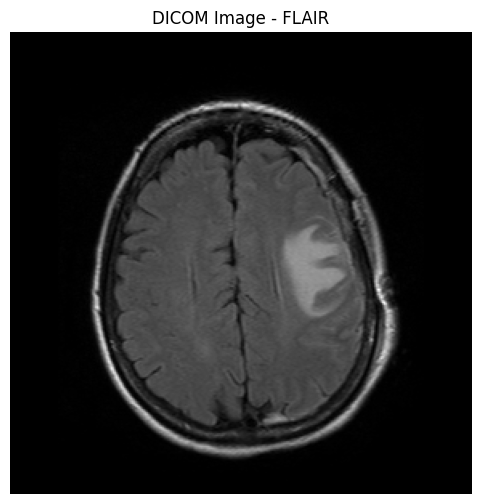

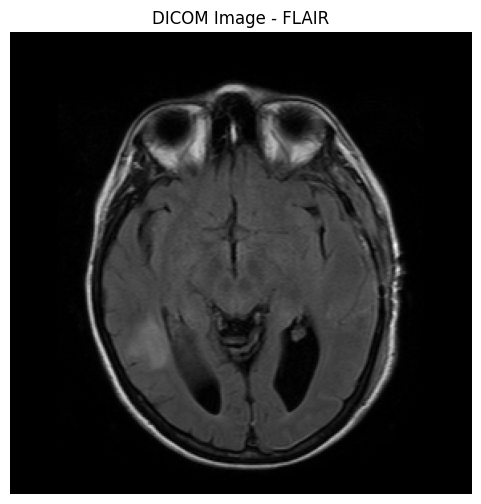

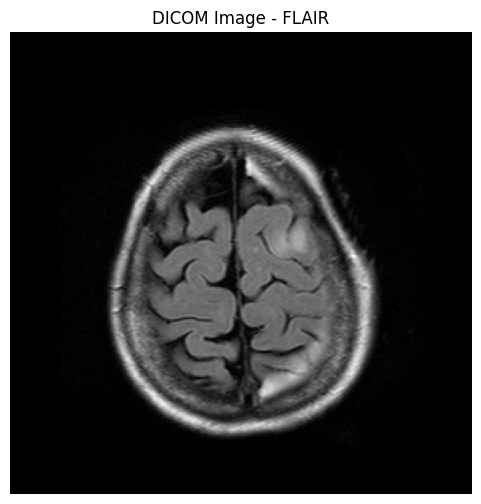

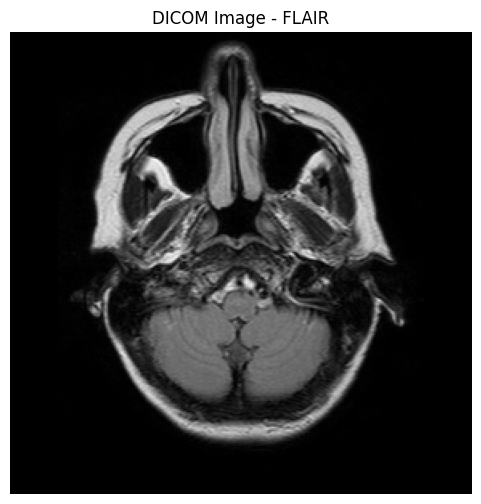

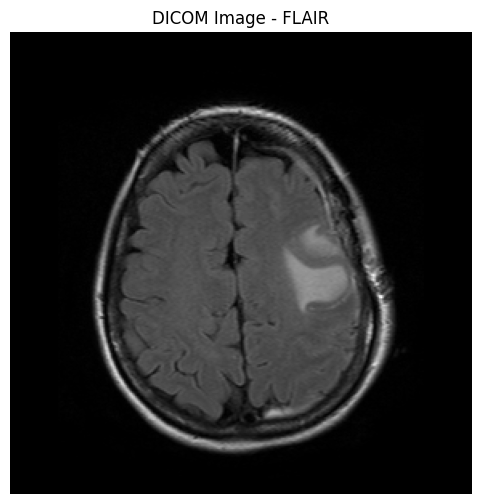

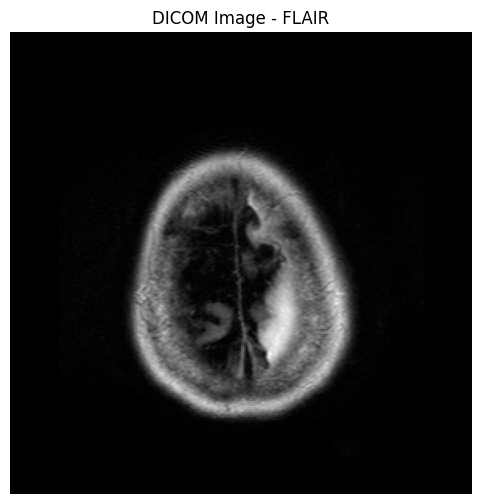

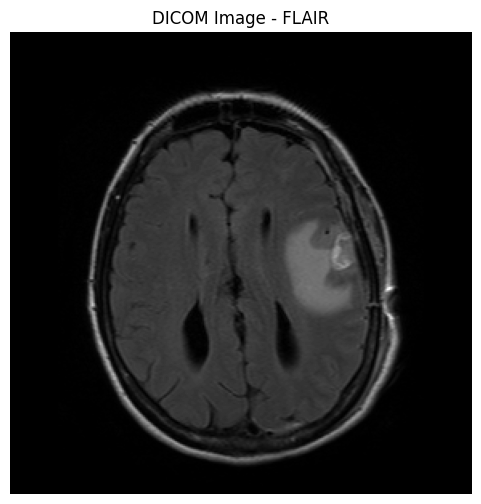

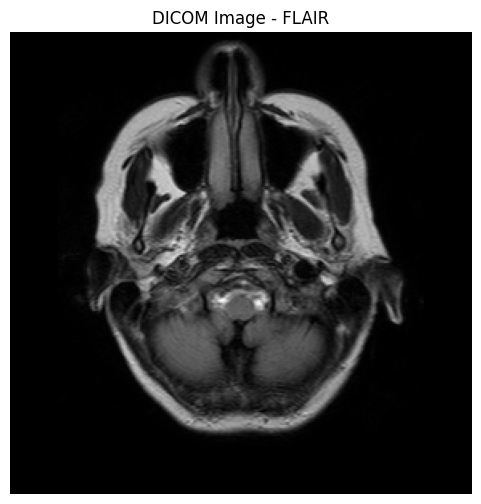

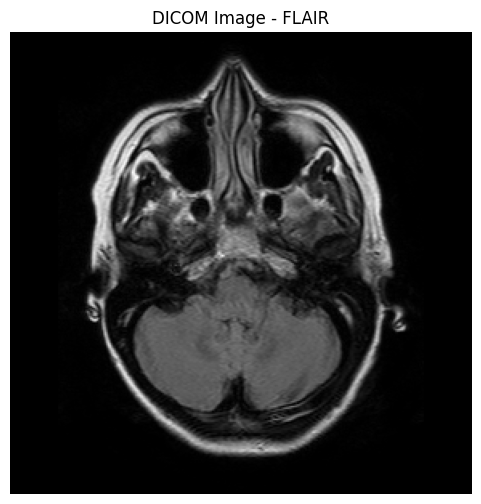

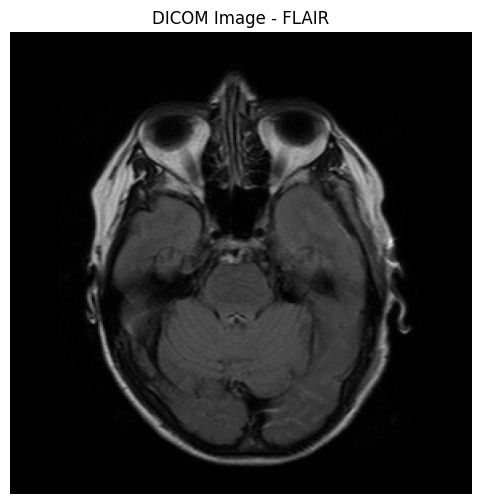

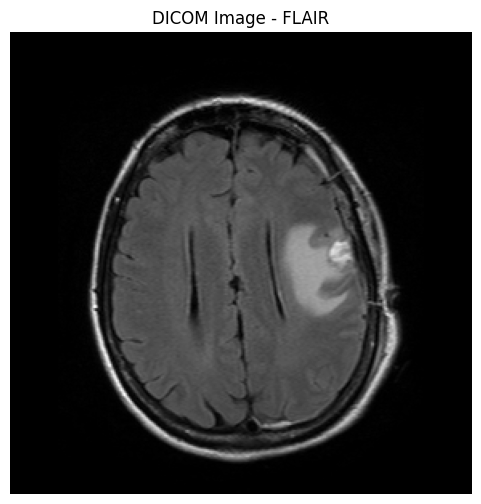

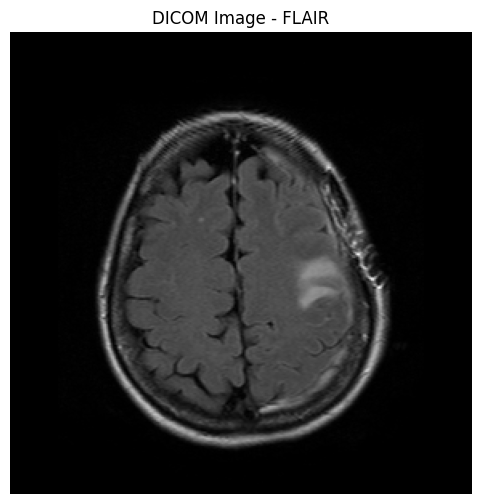

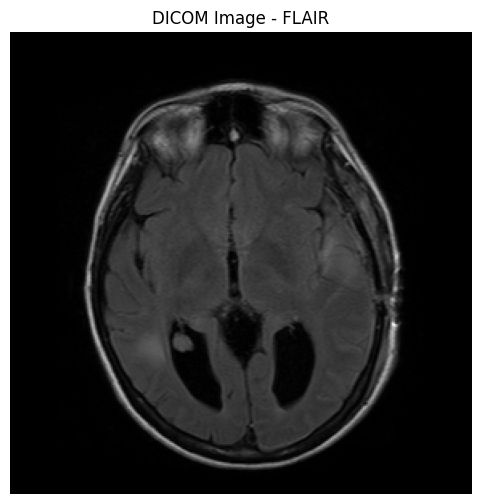

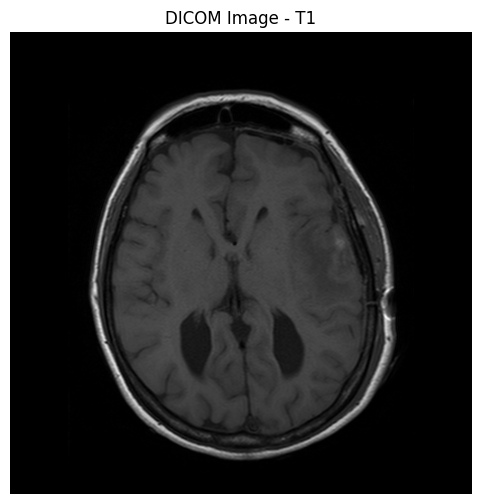

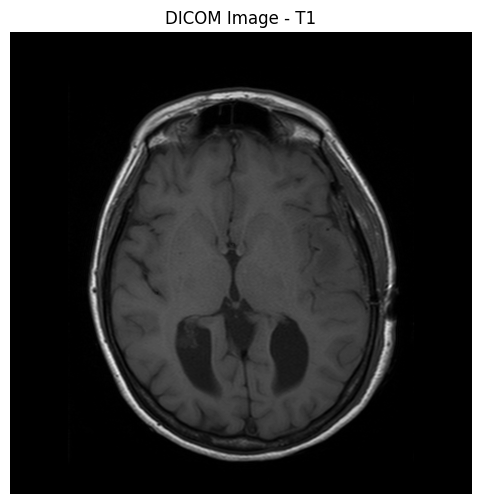

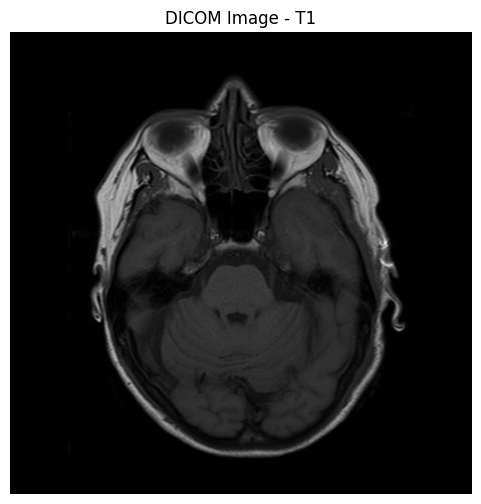

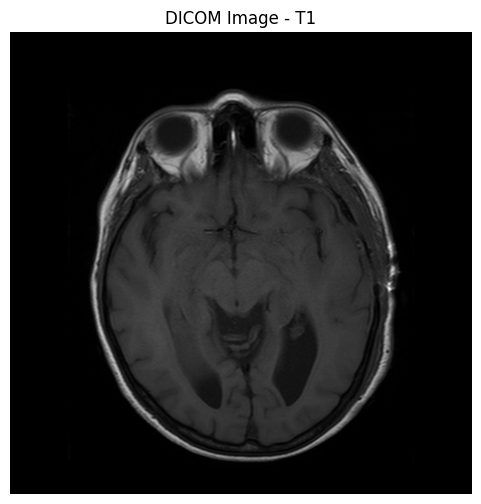

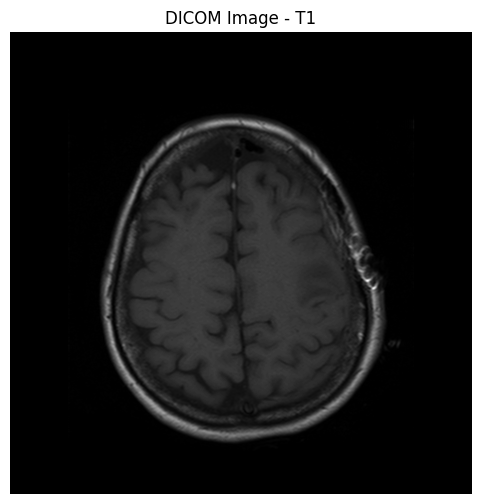

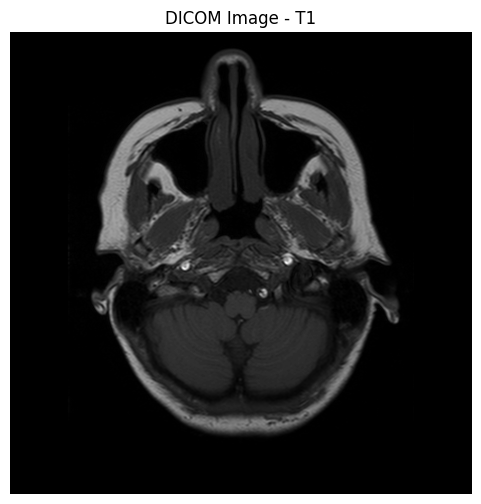

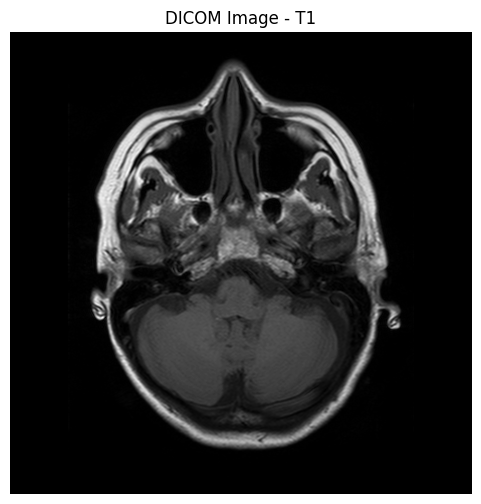

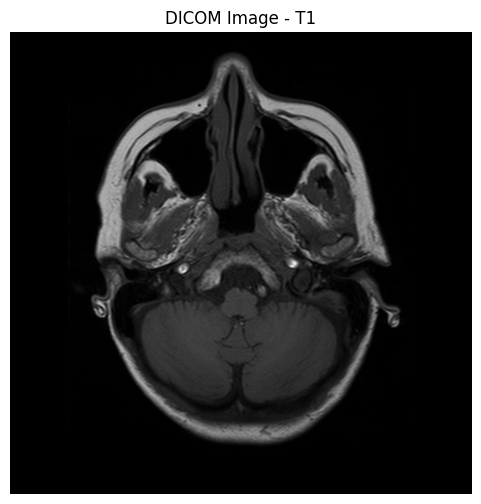

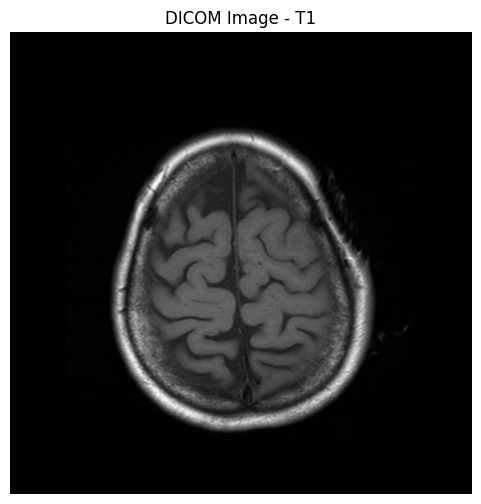

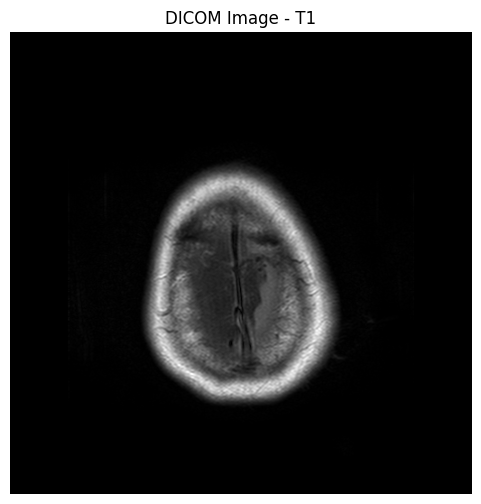

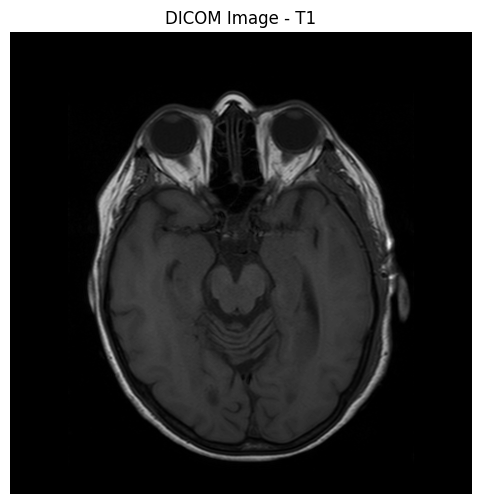

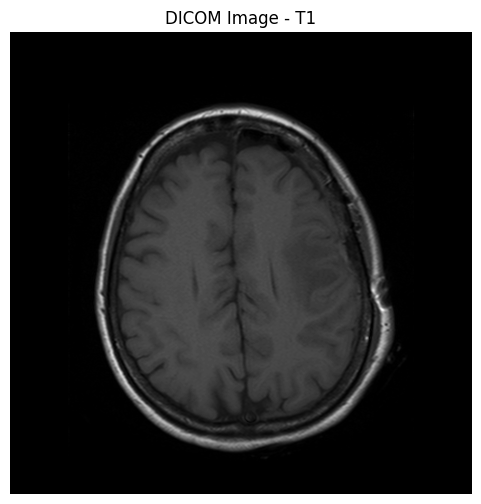

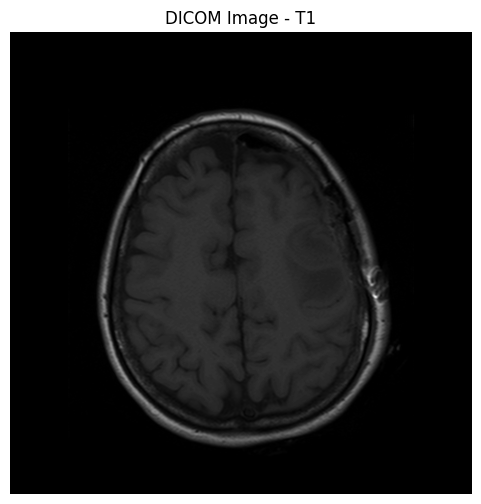

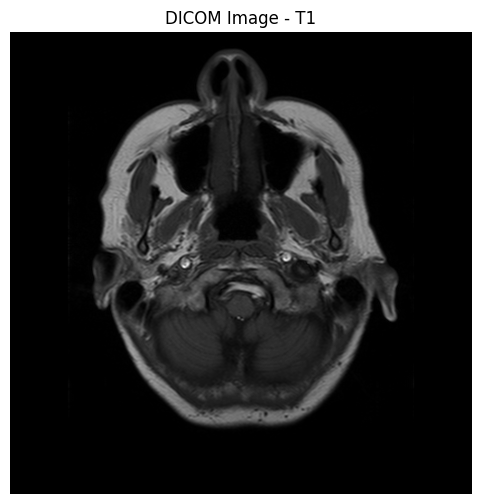

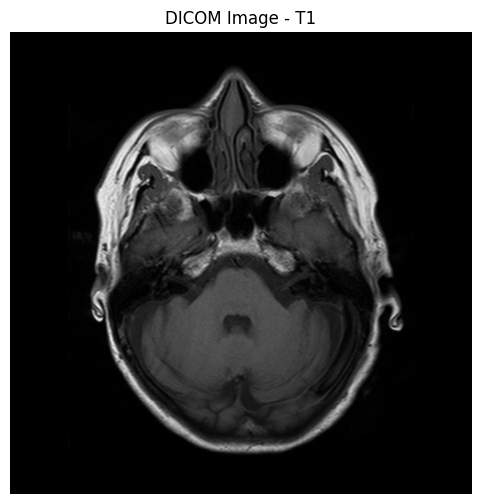

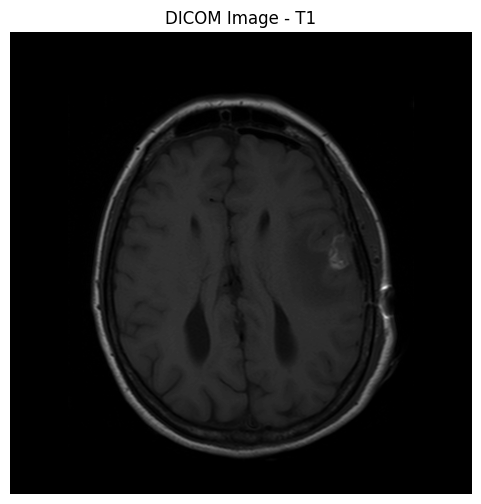

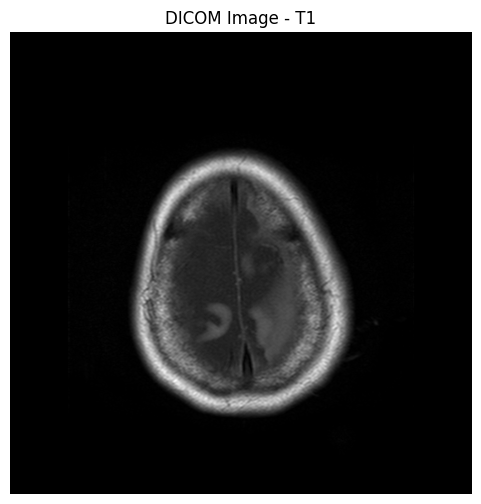

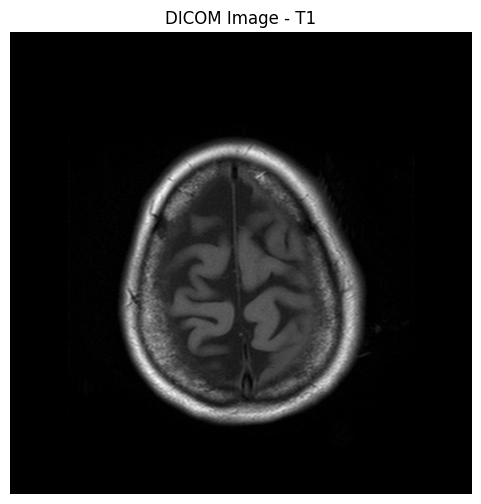

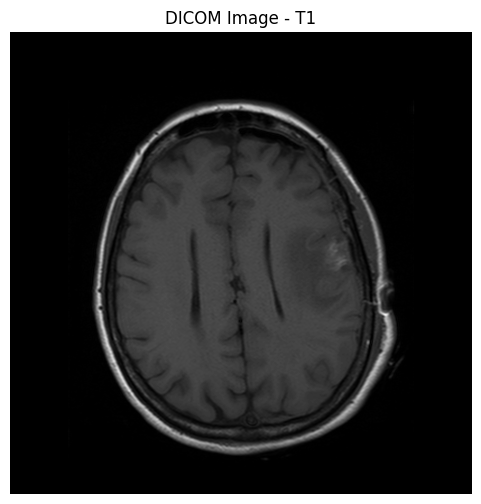

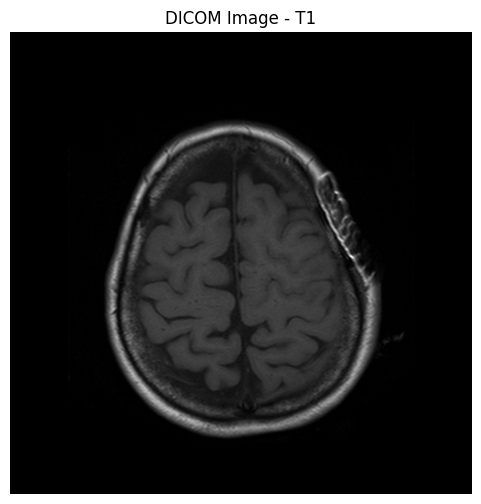

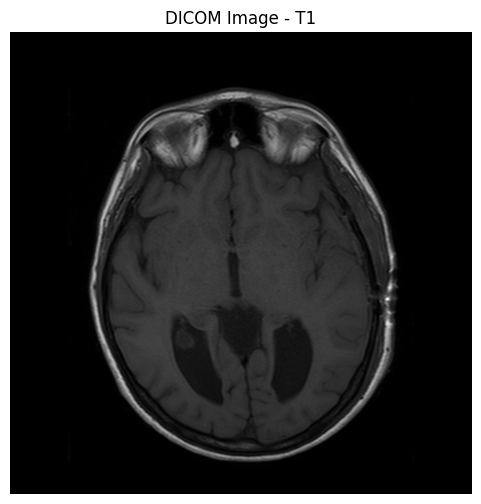

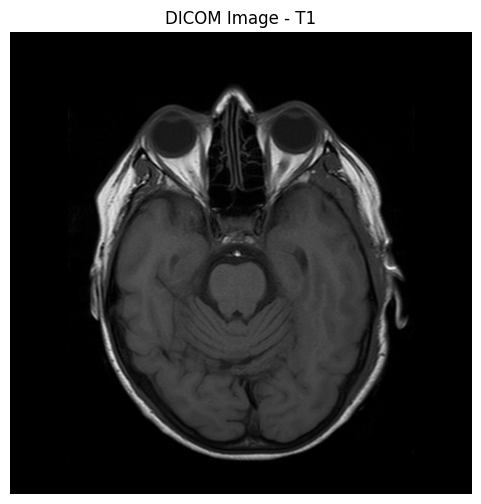

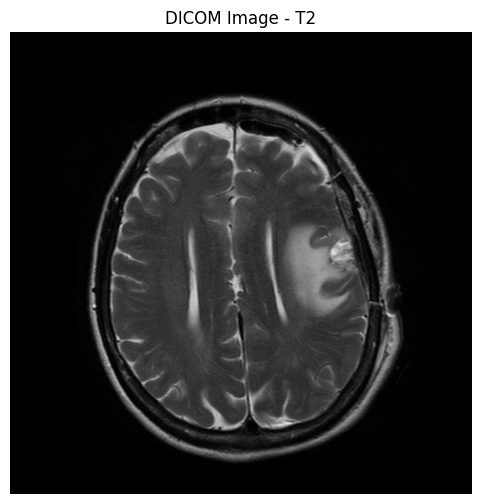

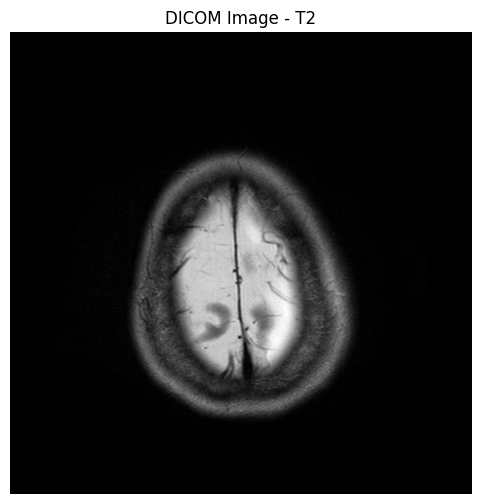

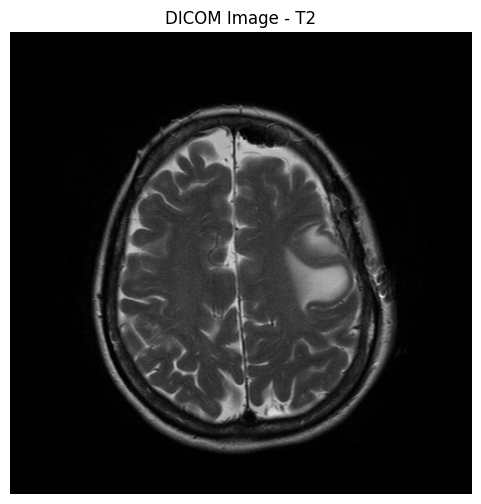

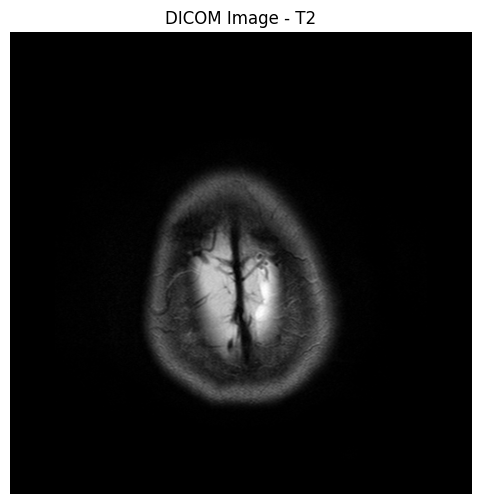

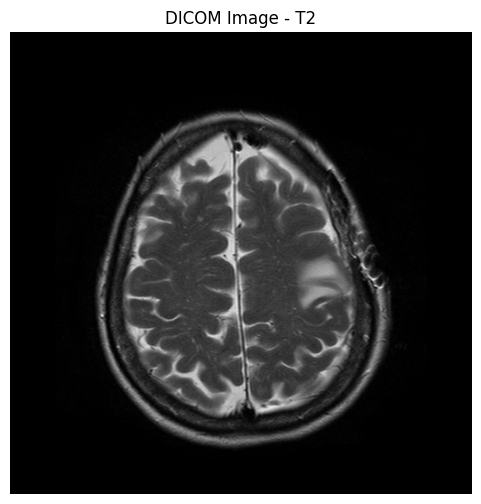

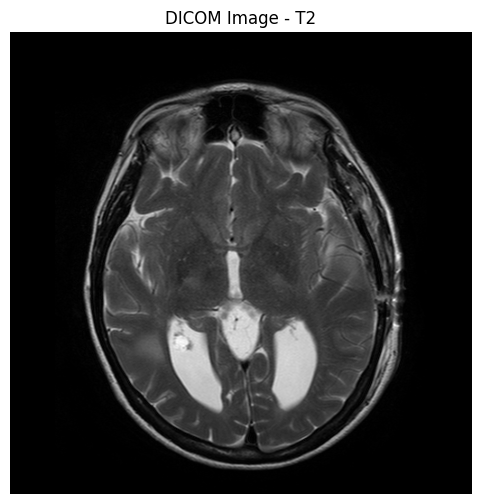

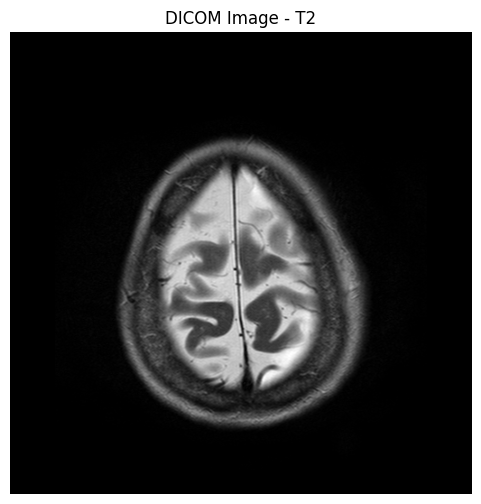

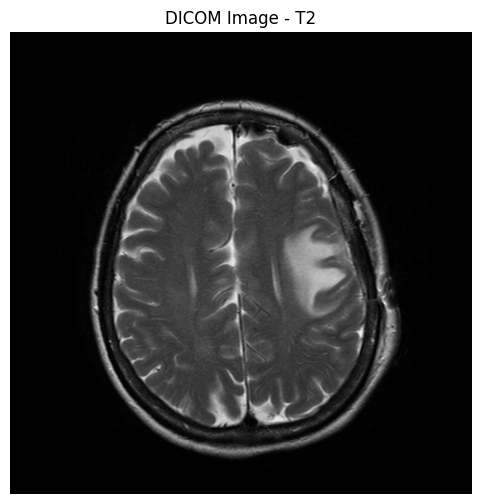

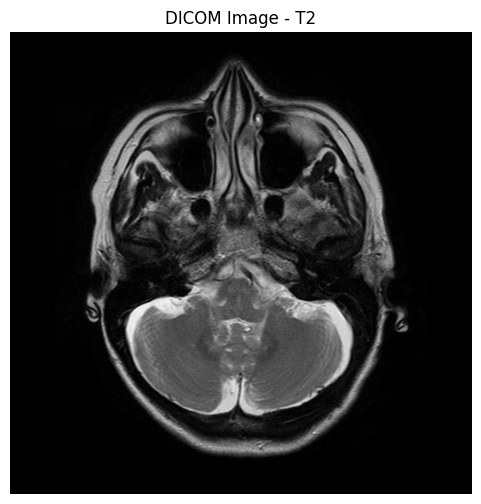

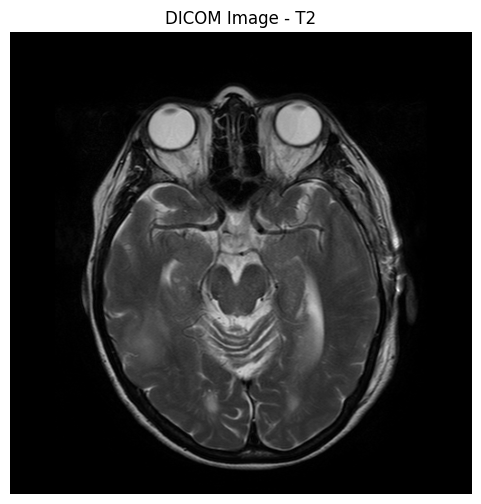

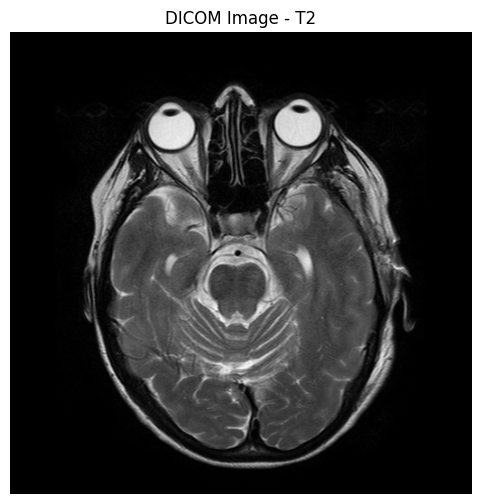

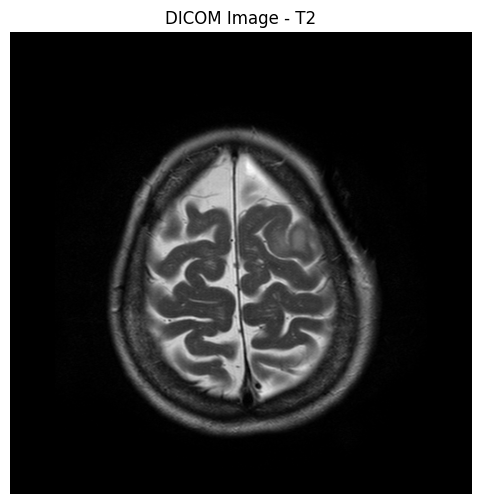

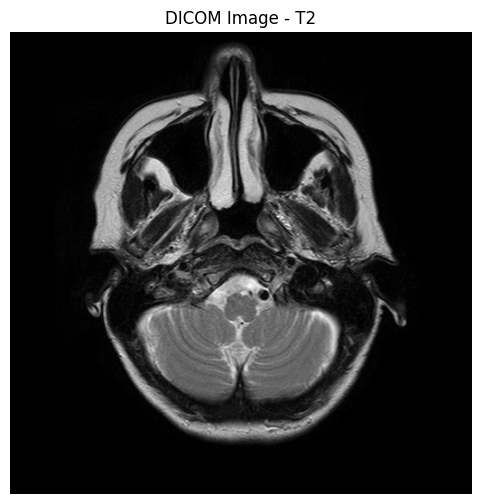

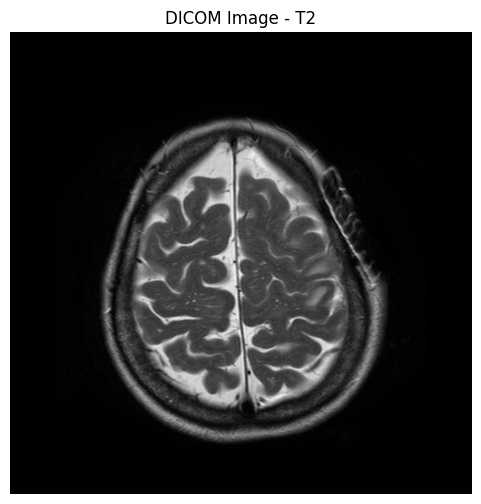

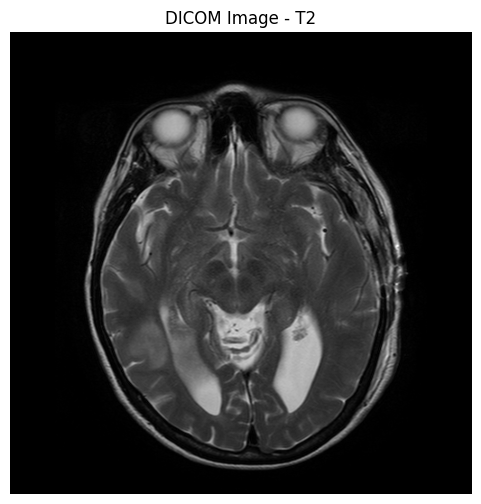

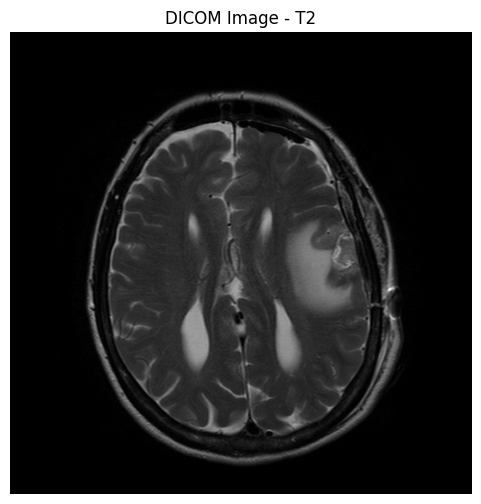

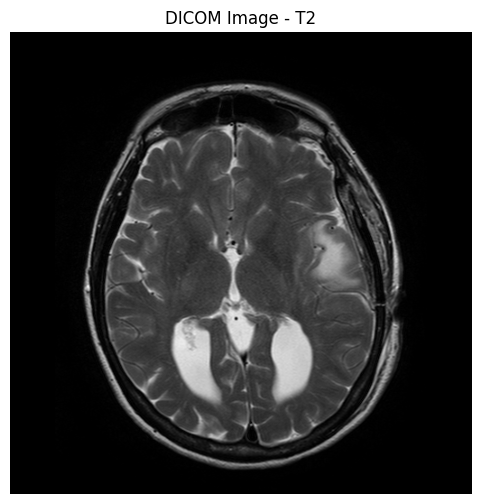

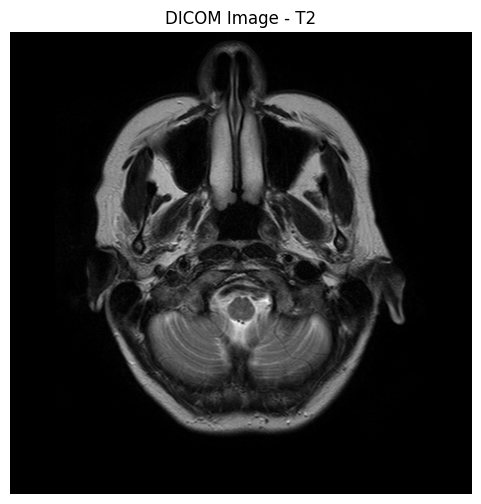

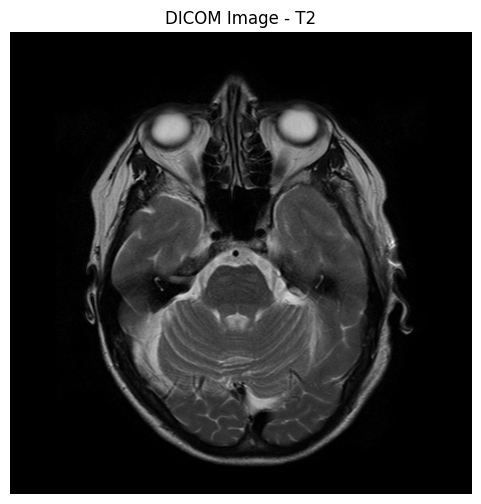

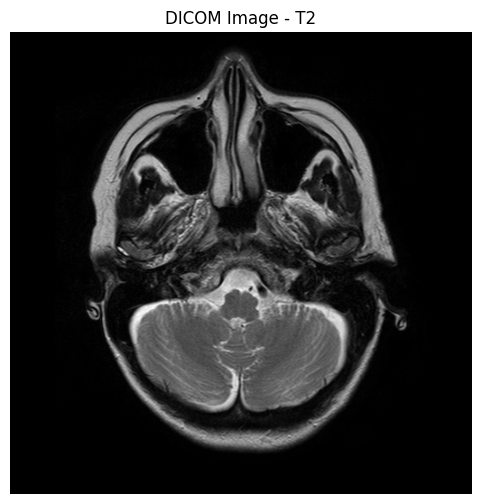

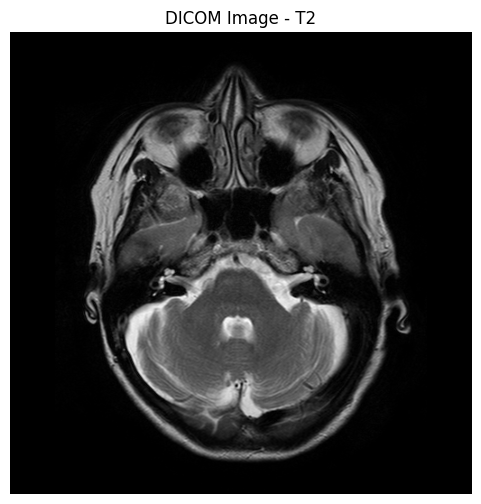

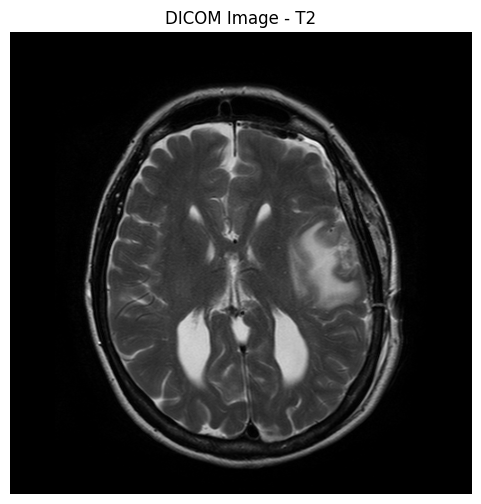

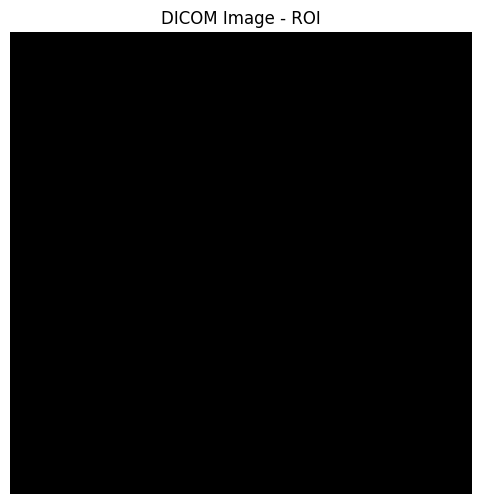

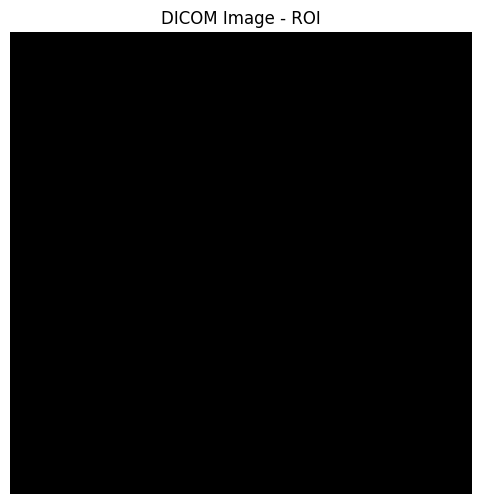

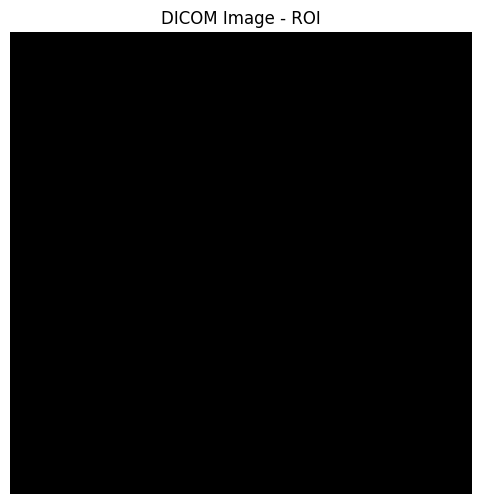

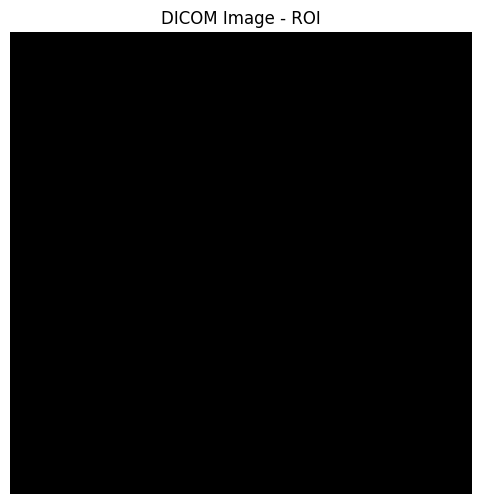

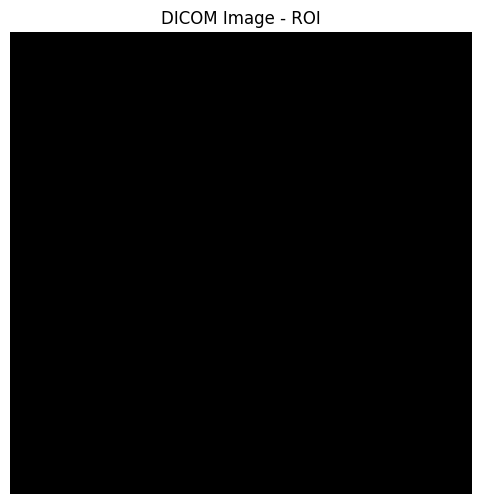

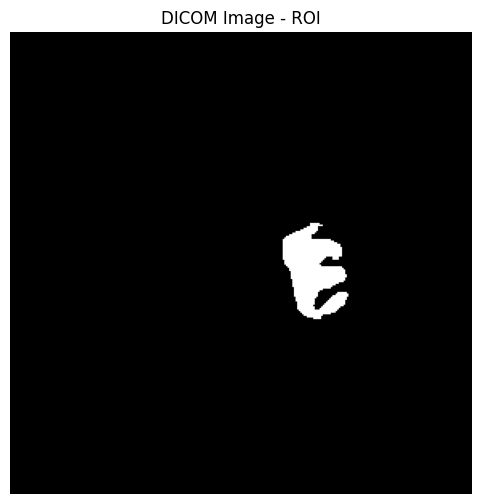

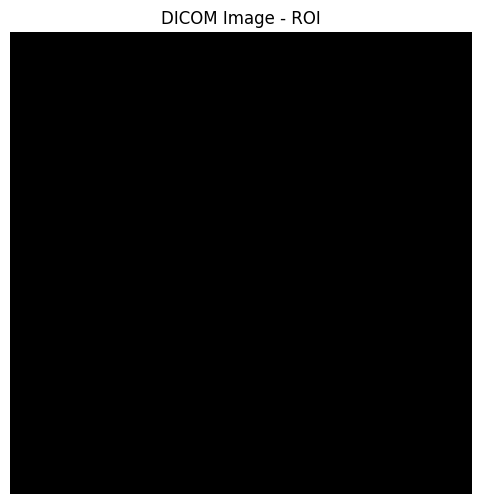

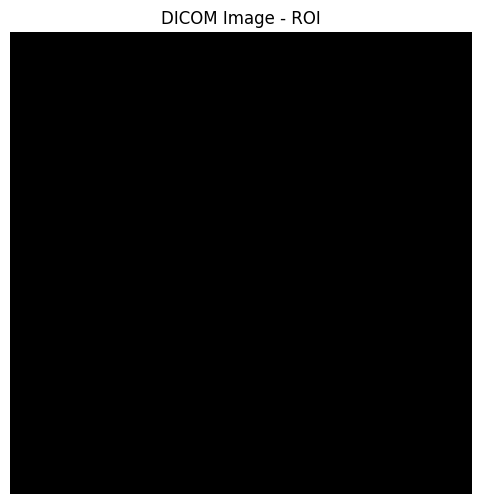

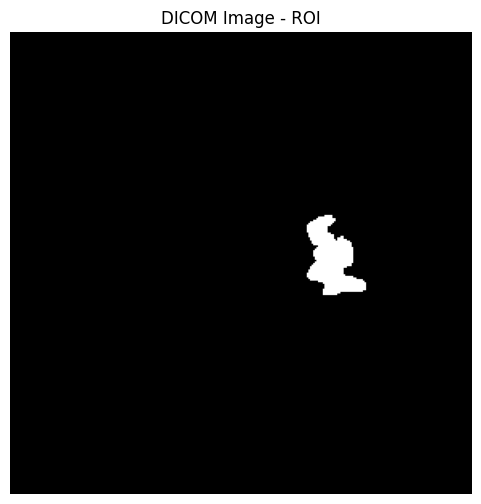

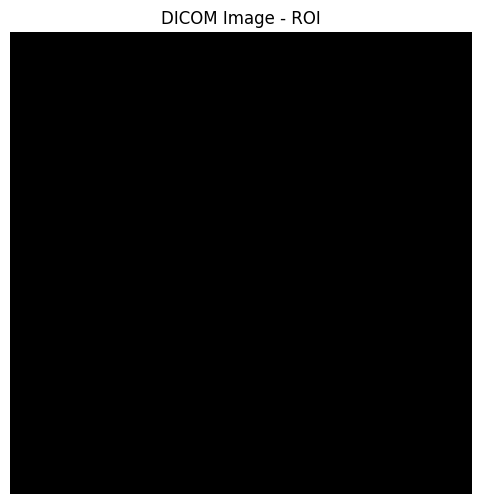

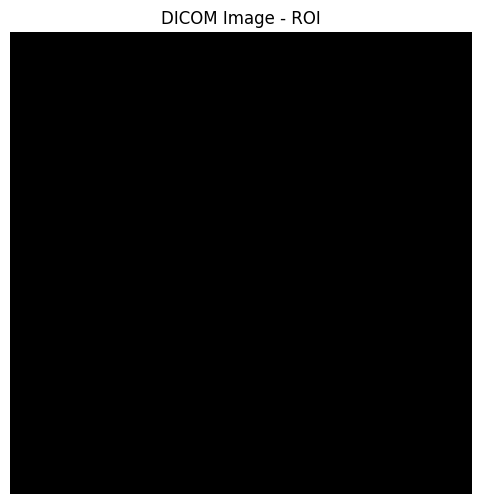

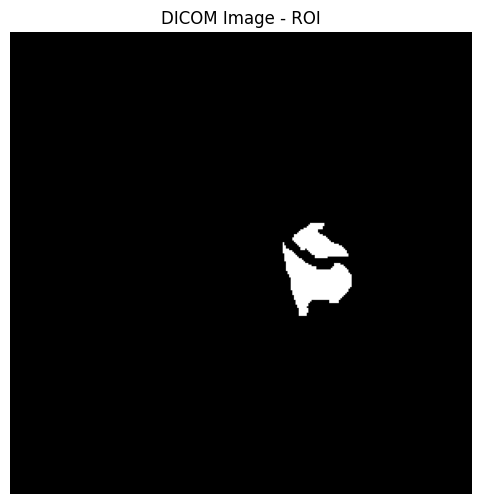

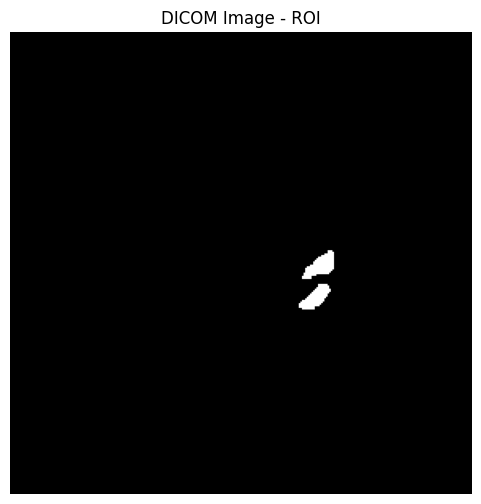

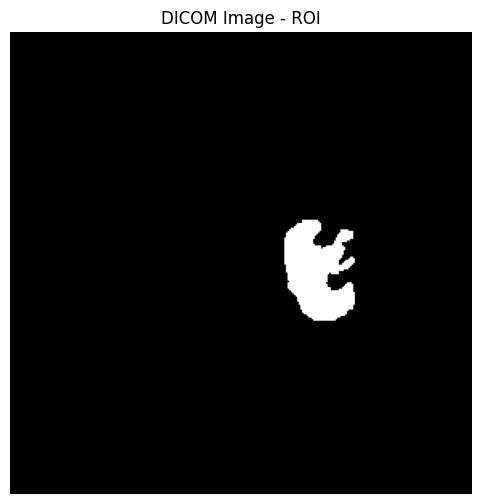

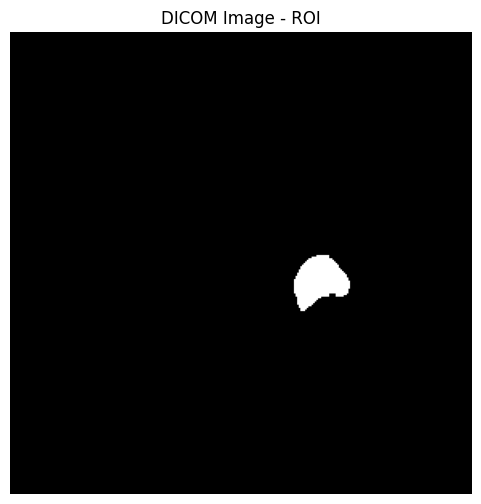

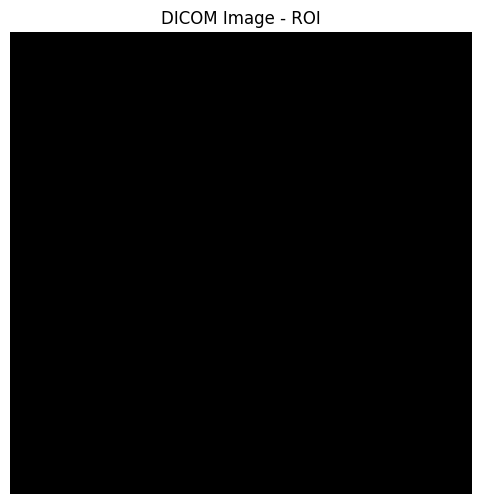

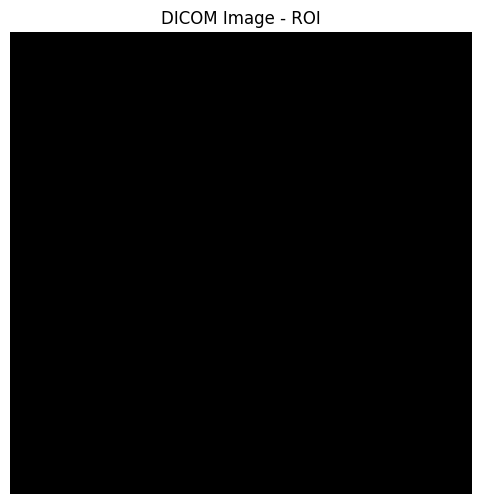

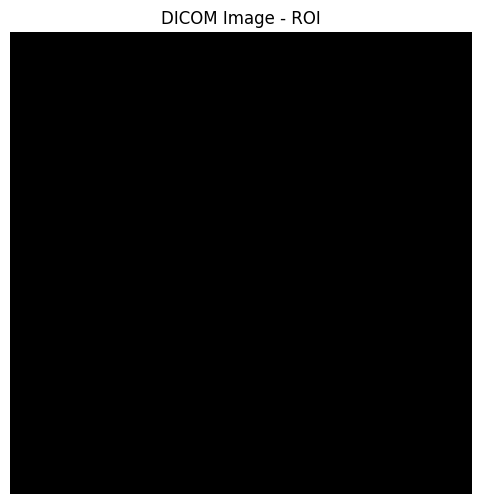

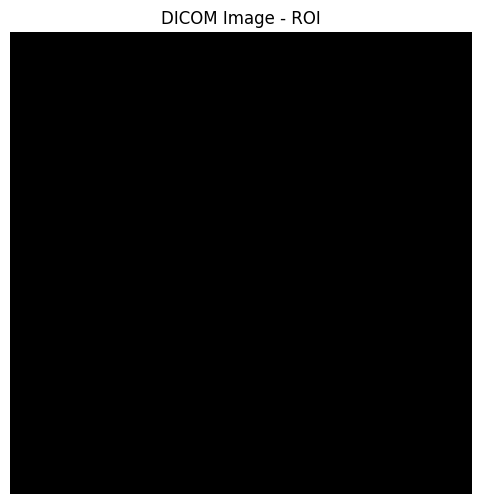

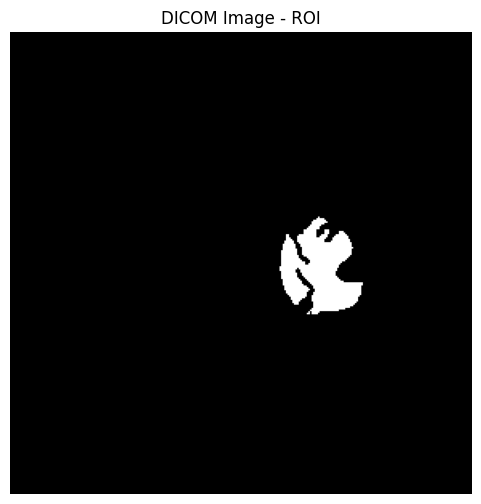

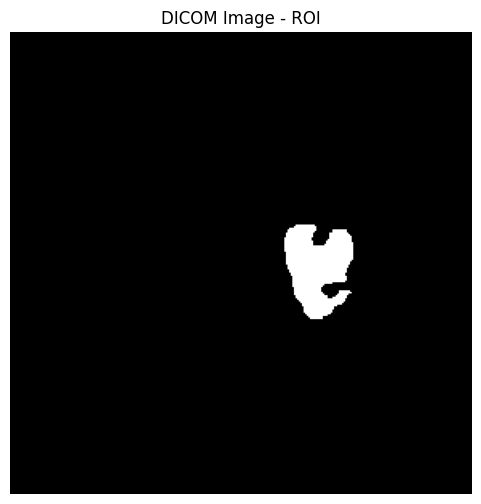

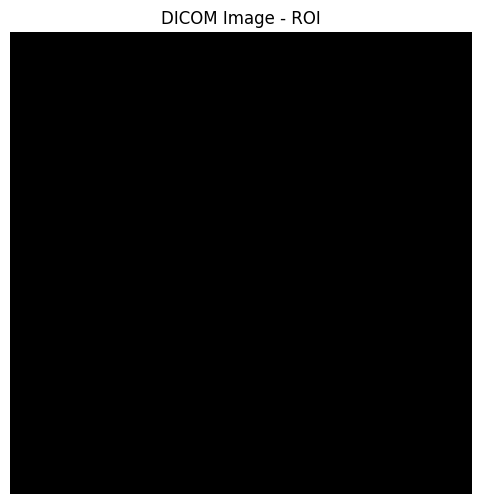

In [ ]:
dicom_dir="/content/DICOM"
modalities = ["FLAIR", "T1", "T2", "ROI"]

# Iterate through each modality folder
for modality in modalities:
    modality_dir = os.path.join(dicom_dir, "DICOM", modality)

    # Get list of DICOM files for the current modality
    dicom_files = [os.path.join(modality_dir, file) for file in os.listdir(modality_dir) if file.endswith('.dcm')]

    # Load and display DICOM images for the current modality
    for file in dicom_files:
        # Read DICOM file
        dicom_data = pydicom.dcmread(file)

        # Get pixel data and metadata
        pixel_data = dicom_data.pixel_array
        metadata = dicom_data

        # Display DICOM image
        plt.figure(figsize=(6, 6))
        plt.imshow(pixel_data, cmap='gray')
        plt.title(f"DICOM Image - {modality}")
        plt.axis('off')
        plt.show()

In [ ]:
def extract_metadata(dicom_folder):
    metadata = []
    for root, dirs, files in os.walk(dicom_folder):
        for file in files:
            if file.endswith('.dcm'):
                dicom_file = os.path.join(root, file)
                ds = pydicom.dcmread(dicom_file)
                metadata.append({
                    'FileName': file,
                    'PatientName': ds.PatientName,
                    'StudyDate': ds.StudyDate,
                    'Modality': ds.Modality,
                    'Rows': ds.Rows,
                    'Columns': ds.Columns,
                    'PixelSpacing': ds.PixelSpacing,
                    'SliceThickness': ds.SliceThickness,
                    'ImagePositionPatient': ds.ImagePositionPatient,
                    'ImageOrientationPatient': ds.ImageOrientationPatient
                })
    return metadata

metadata = extract_metadata(dicom_dir)

for data in metadata:
    print(data)

{'FileName': 'BRAINIX_DICOM_T2_IM-0001-0009.dcm', 'PatientName': 'BRAINIX', 'StudyDate': '20061201', 'Modality': 'MR', 'Rows': 512, 'Columns': 512, 'PixelSpacing': [0.44921875, 0.44921875], 'SliceThickness': '5.0', 'ImagePositionPatient': [-117.34666425152, -115.41461587042, 35.8555738553404], 'ImageOrientationPatient': [0.99971222877502, 7.8810308973E-12, 0.02398800104856, -0.0017278126906, 0.99740260839462, 0.07200747728347]}
{'FileName': 'BRAINIX_DICOM_T2_IM-0001-0002.dcm', 'PatientName': 'BRAINIX', 'StudyDate': '20061201', 'Modality': 'MR', 'Rows': 512, 'Columns': 512, 'PixelSpacing': [0.44921875, 0.44921875], 'SliceThickness': '5.0', 'ImagePositionPatient': [-118.35154324932, -118.43980056138, 77.7344305142760], 'ImageOrientationPatient': [0.99971222877502, 7.8810308973E-12, 0.02398800104856, -0.0017278126906, 0.99740260839462, 0.07200747728347]}
{'FileName': 'BRAINIX_DICOM_T2_IM-0001-0007.dcm', 'PatientName': 'BRAINIX', 'StudyDate': '20061201', 'Modality': 'MR', 'Rows': 512, 'Col